In [8]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv('./titanic/train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


###  Questions  

- Who where the passenger? (Age, Gender, Class, etc.)
- What deck are the passenger on and how does that relate to their class?
- Where did the passenger come from?
- Who was alone and who was with family?

and the most challenging:

- What factors helped someone survive the sinking?

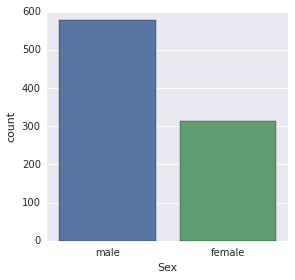

In [10]:
sns.factorplot('Sex', data=titanic_df, kind='count')

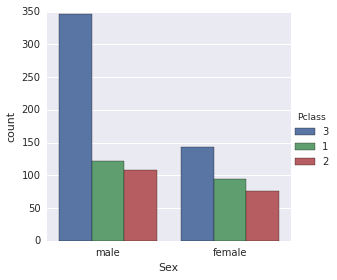

In [12]:
sns.factorplot('Sex', data=titanic_df, kind='count', hue='Pclass')

#It seems that most of the male passengers were on 3rd class

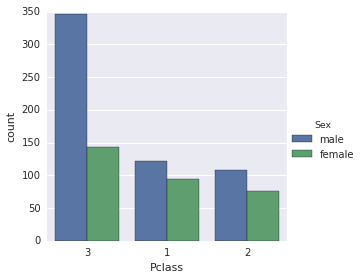

In [13]:
# this confirm that most of the males were on 3rd class

sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Sex')

In [17]:
male_female_child = lambda passenger: 'child' if passenger['Age'] < 16 else passenger['Sex']

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [20]:
titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


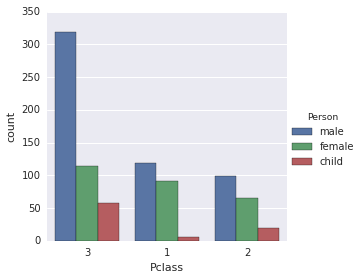

In [22]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Person')

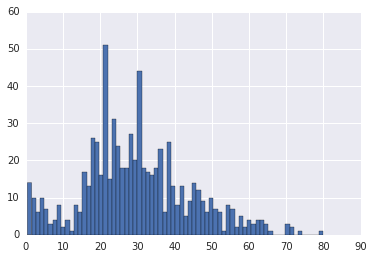

In [24]:
# Most children are in 3rd class, we can check this distribution
titanic_df['Age'].hist(bins=70)

In [25]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

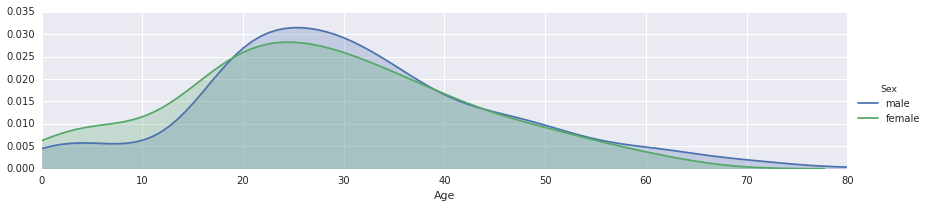

In [29]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

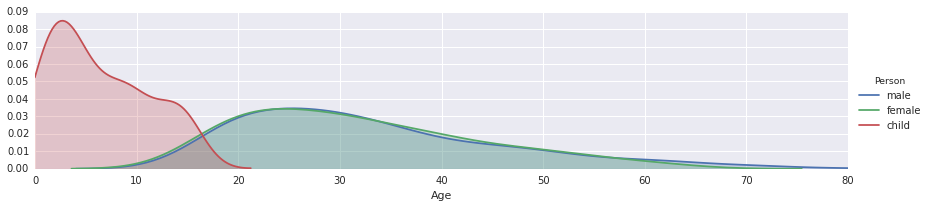

In [31]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

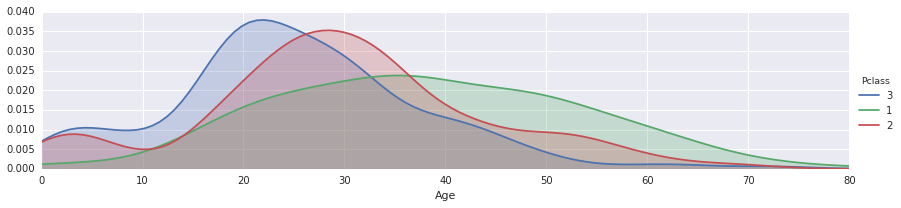

In [32]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

In [33]:
deck = titanic_df['Cabin'].dropna()

In [34]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [36]:
levels = [level[0] for level in deck]

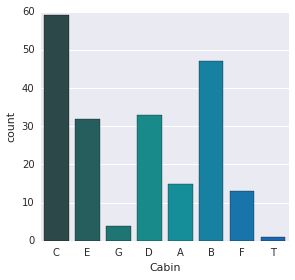

In [40]:
cabin_df = DataFrame(levels, columns=['Cabin'])
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

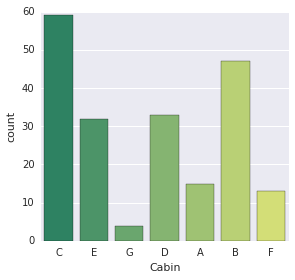

In [49]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='summer')

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


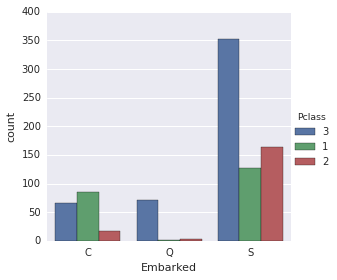

In [48]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [55]:
alone = lambda relation: 'with_family' if relation.SibSp + relation.Parch > 0 else 'alone'
titanic_df['Alone'] = titanic_df[['SibSp', 'Parch']].apply(alone, axis=1)

# altro modo
# titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
# titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'with_family'
# titanic_df['Alone'].loc[titanic_df['Alone'] == 0) = 'alone'

In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,with_family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,with_family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,with_family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,alone


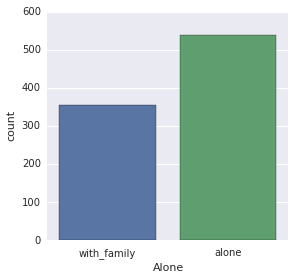

In [58]:
sns.factorplot('Alone', data=titanic_df, kind='count')

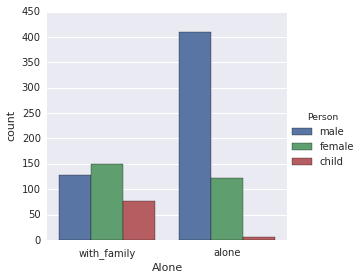

In [60]:
sns.factorplot('Alone', data=titanic_df, hue='Person', kind='count')

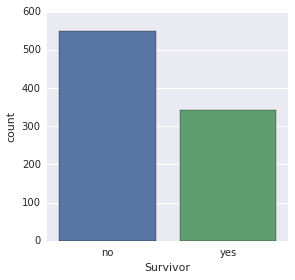

In [62]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})
sns.factorplot('Survivor', data=titanic_df, kind='count')

In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,with_family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,with_family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,with_family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,alone,no


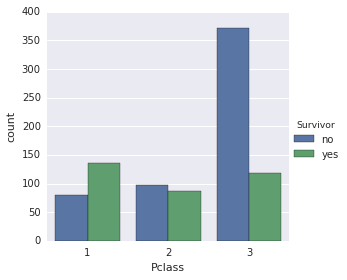

In [67]:
sns.factorplot('Pclass', data=titanic_df, hue='Survivor', kind='count', order=[1, 2, 3])

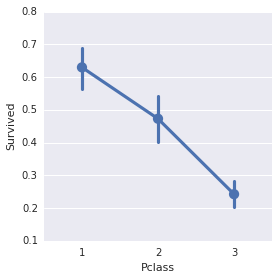

In [72]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1, 2, 3])

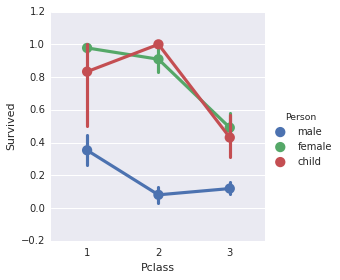

In [74]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, hue='Person', order=[1, 2, 3])

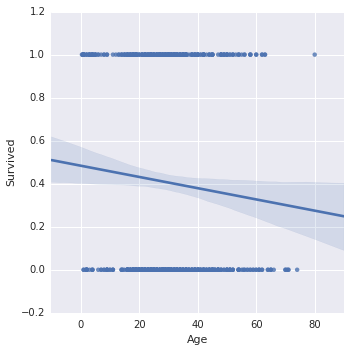

In [75]:
sns.lmplot('Age', 'Survived', data=titanic_df)

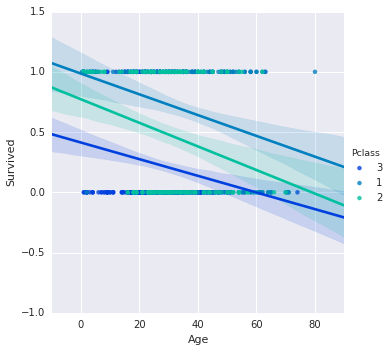

In [77]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter')

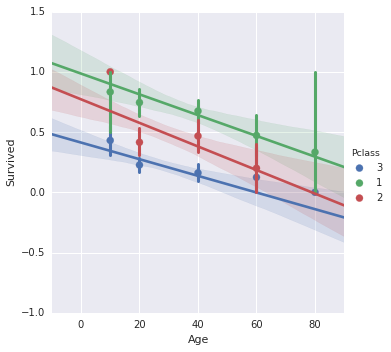

In [79]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, x_bins=generations)

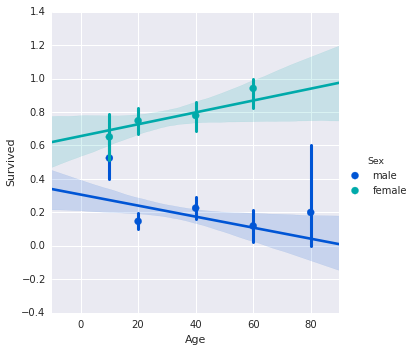

In [80]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

### Other questions

- Did the deck have an effect on the passsengers survival rate? Did the answer match with yuor intuition?
- Did having a family member increase the odds of surviving the crash?

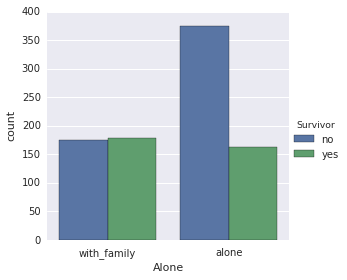

In [84]:
sns.factorplot('Alone', data=titanic_df, hue='Survivor', kind='count')

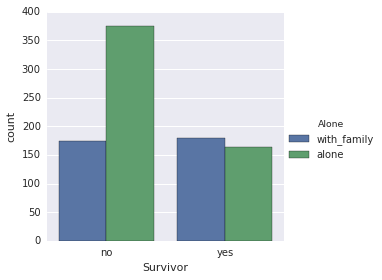

In [85]:
sns.factorplot('Survivor', data=titanic_df, hue='Alone', kind='count')